In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [47]:
data = pd.read_csv("Mall_Customers.csv",sep=',')
print(data.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [48]:
print(data.info())
print(data.describe().transform)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
<bound method DataFrame.transform of        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750

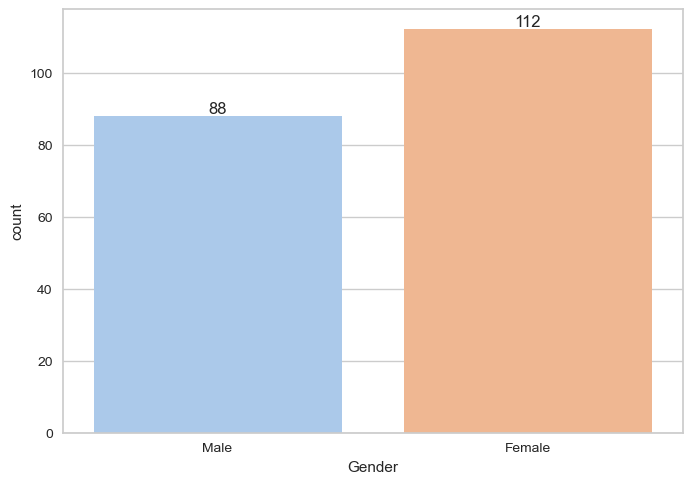

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

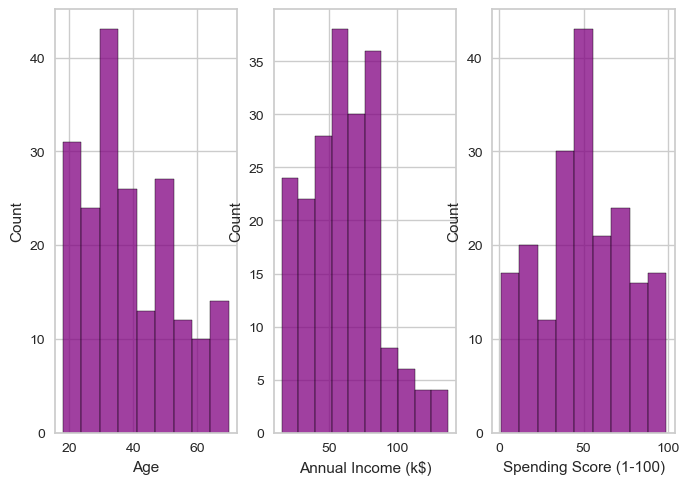

In [49]:
# plots to visualize data : 
ax = sns.countplot(x='Gender', data=data, palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

fig, axs = plt.subplots(ncols=3)
sns.histplot(x='Age', data=data, color='purple', ax=axs[0])
sns.histplot(x='Annual Income (k$)', data=data, color='purple', ax=axs[1])
sns.histplot(x='Spending Score (1-100)', data=data, color='purple', ax=axs[2])

In [50]:
# preparing data to analysis :
df = data.drop(columns='CustomerID')
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender'],dtype=int) 
to_scal_data = one_hot_encoded_data.drop(columns=['Gender_Female', 'Gender_Male'])

# standardization to the same scale :
scaler = StandardScaler()
scaled_data = scaler.fit_transform(to_scal_data)
d_ready = np.append(scaled_data, one_hot_encoded_data['Gender_Female'].values.reshape(200, 1), axis=1)
d_ready = np.append(d_ready, one_hot_encoded_data['Gender_Male'].values.reshape(200, 1), axis=1)

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


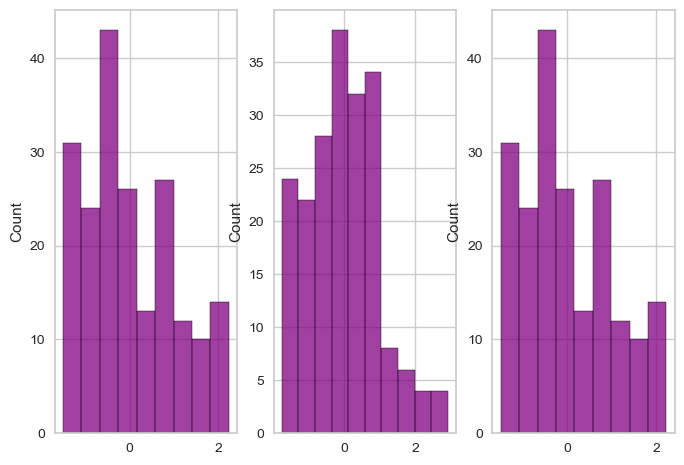

In [51]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(x=scaled_data[:, 0], color='purple', ax=axs[0])
sns.histplot(x=scaled_data[:, 1], data=scaled_data, color='purple', ax=axs[1])
sns.histplot(x=scaled_data[:, 0], data=scaled_data, color='purple', ax=axs[2])
plt.show()

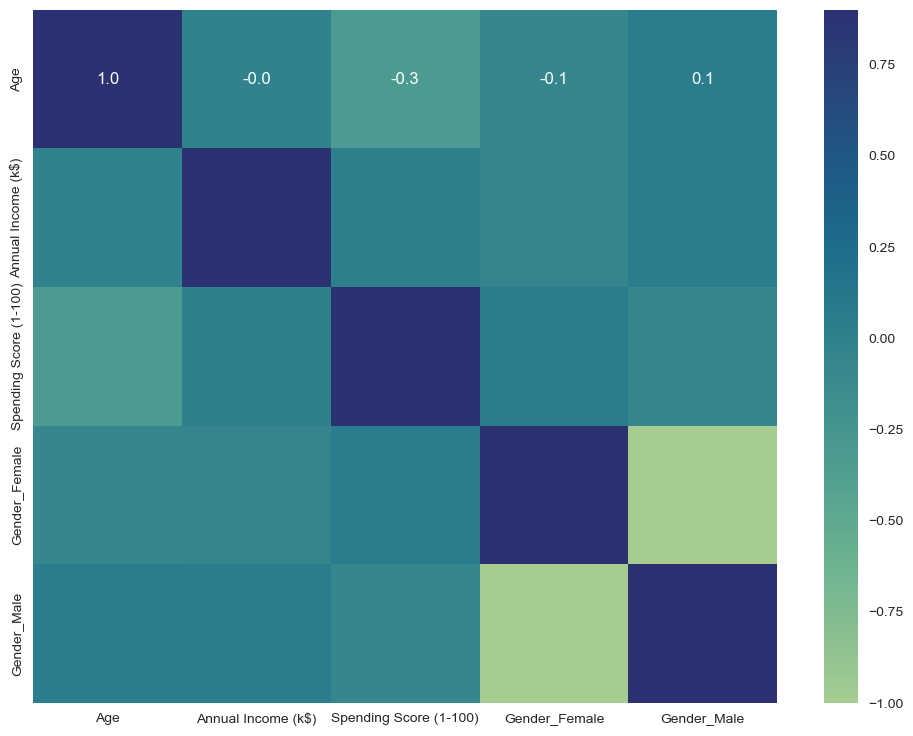

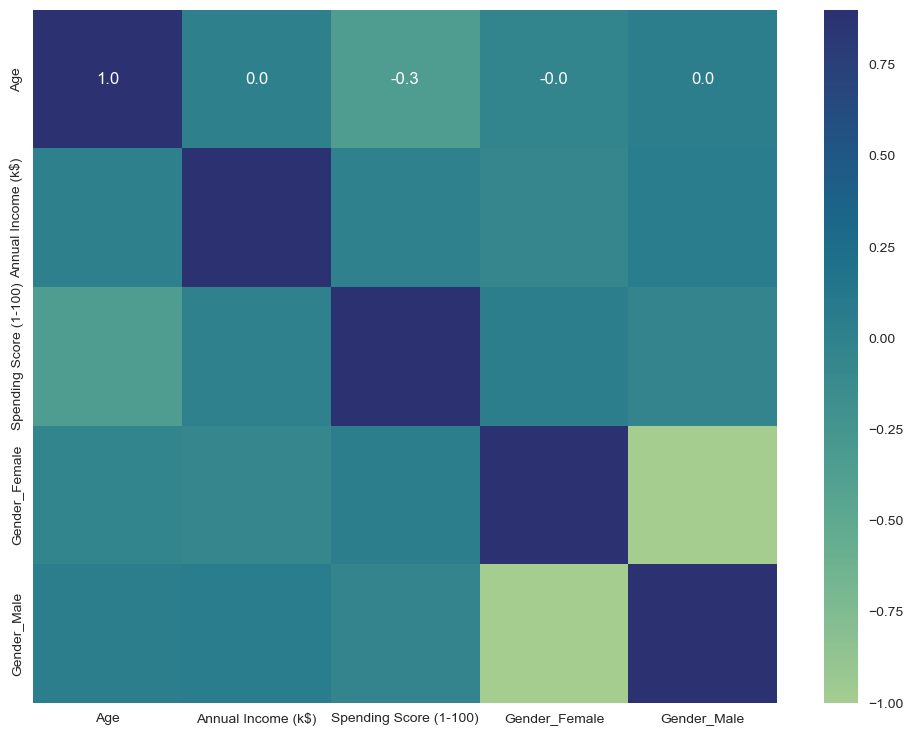

SignificanceResult(statistic=-0.3272268460390901, pvalue=2.2502957035652467e-06)
5.674387092093432e-07
0.7811510866452446
0.9122697727000879


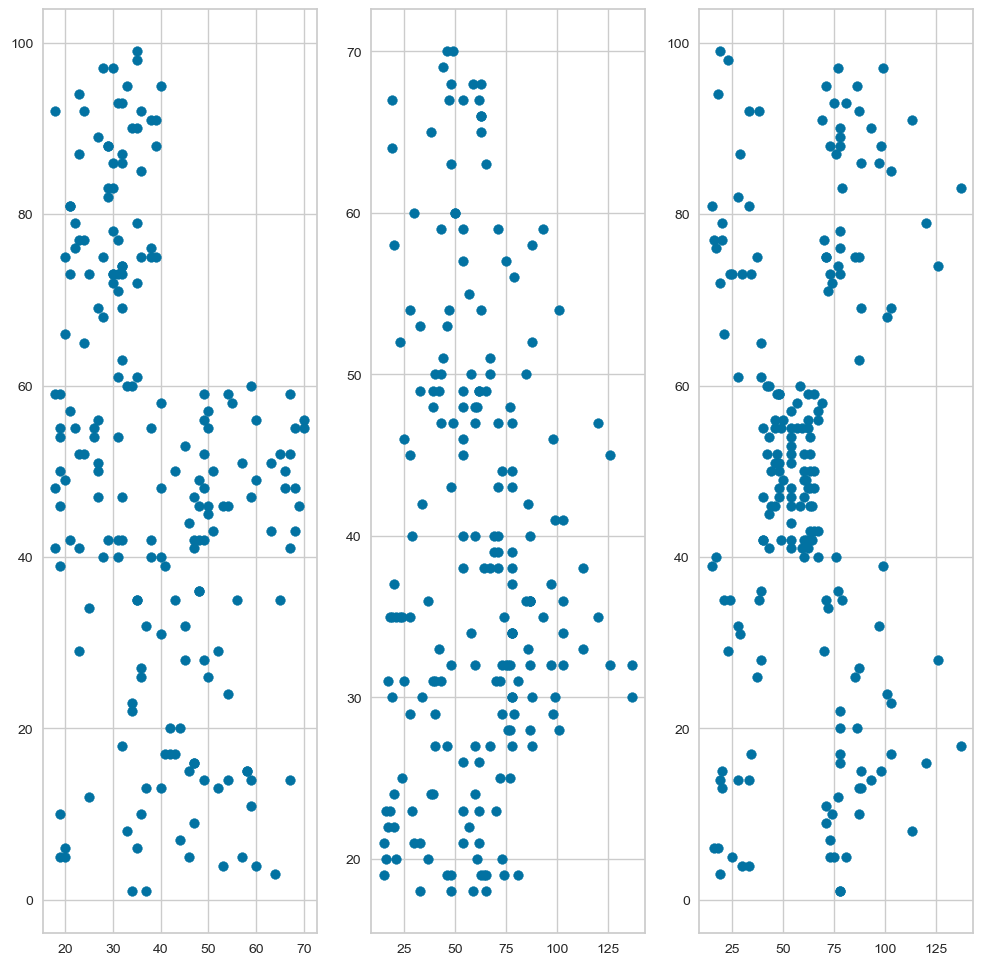

In [52]:
# making correlations to see some connections between features : 
dfull_scaled = pd.DataFrame(d_ready, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male'])
corr_p = dfull_scaled.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_p, cmap="crest", vmax=0.9, fmt='.1f', annot=True)
plt.show()

plt.subplots(figsize=(12, 9))
corr_s = dfull_scaled.corr('spearman', numeric_only=False)
sns.heatmap(corr_s, cmap="crest", vmax=0.9, fmt='.1f', annot=True)
plt.show()

# testing if the 'Age' and 'Spending score' correlation is statistically significant: 
corr_bi = stats.pointbiserialr(dfull_scaled['Age'], dfull_scaled['Spending Score (1-100)'])
print(corr_bi)
age_spend = stats.spearmanr(dfull_scaled['Age'], dfull_scaled['Spending Score (1-100)'])
print(age_spend.pvalue)
corr_bi2 = stats.spearmanr(dfull_scaled['Age'], dfull_scaled['Annual Income (k$)'])
print(corr_bi2.pvalue)
corr_bi3 = stats.spearmanr(dfull_scaled['Spending Score (1-100)'], dfull_scaled['Annual Income (k$)'])
print(corr_bi3.pvalue)

# making scatter plots to see their distribution and possible patterns : 
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
axs[0].scatter(data['Age'], data['Spending Score (1-100)'])
axs[1].scatter(data['Annual Income (k$)'], data['Age'])
axs[2].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.show()

In [53]:
# people around 20-35 and 35-70 with different avarege of spend score
# the plot shows that people younger then 40 years significally have 
# higher 'spending score' even if they income is low 
# we can see negative correlation that is satistically significant and 
# it parts data into 2 possible clusters
# i will use 2 clustering algorithms k-means and dbscan
# those data points with marked gender:

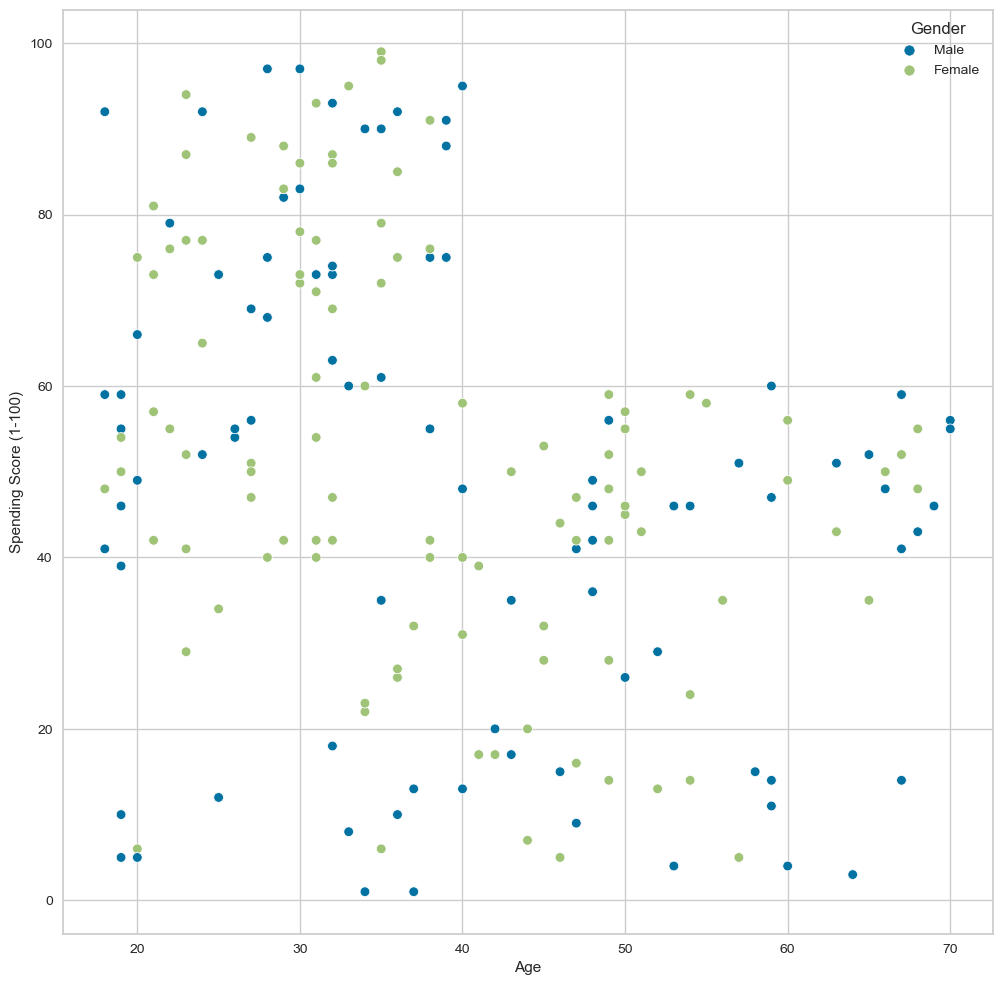

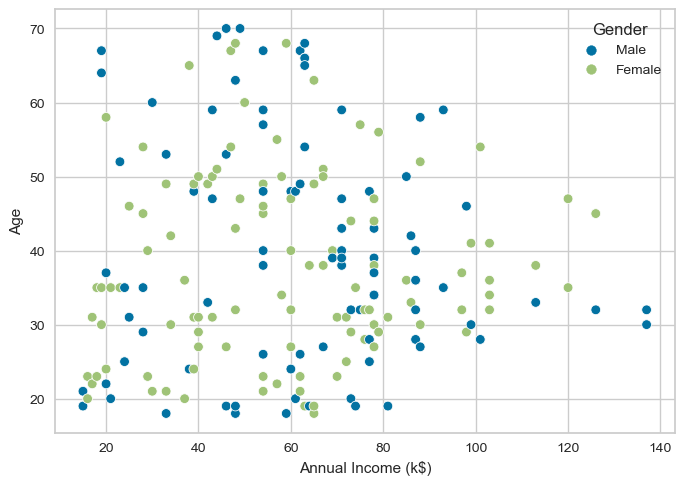

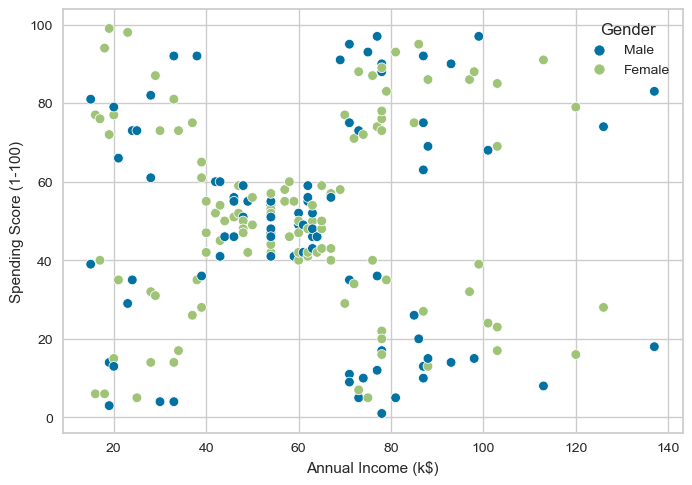

In [54]:
plt.subplots(figsize=(12, 12))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue=data['Gender'], data=data, legend='full')
plt.show()
plt.close()
sns.scatterplot(x='Annual Income (k$)', y='Age', hue=data['Gender'], data=data, legend='full')
plt.show()
plt.close()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=data['Gender'], data=data, legend='full')
plt.show()

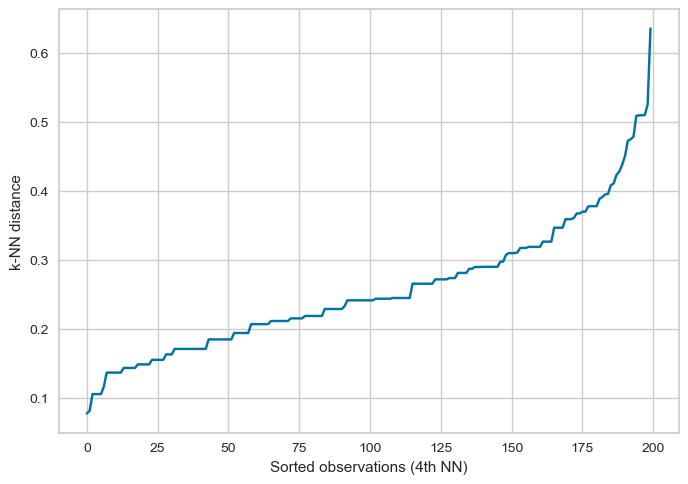

In [55]:
# DBSCAN Clustering:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

data_2col = dfull_scaled.drop(columns=['Gender_Female', 'Gender_Male', 'Annual Income (k$)'])
# looking for correct parameters for a DBSCAN clustering : 
nbrs = NearestNeighbors(n_neighbors = 5).fit(data_2col)
neigh_dist, neigh_ind = nbrs.kneighbors(data_2col)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)
k_dist = sort_neigh_dist[:, 4]

plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [56]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)
# getting the estimate of knee point :
print(kneedle.knee_y)

0.5083314705032506


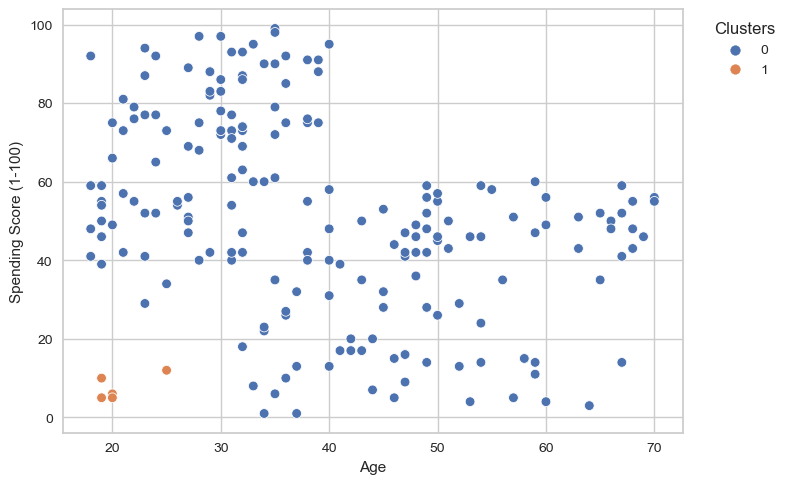

In [57]:
# DBSCAN model :
dbscan_model = DBSCAN(eps=.508, min_samples=4).fit(data_2col)

p = sns.scatterplot(data = data, x = 'Age', y = 'Spending Score (1-100)', hue = dbscan_model.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

# even with diiferent epsilon from 0.3 to 0.5 and different min.samples the dbscan does not fit well here

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

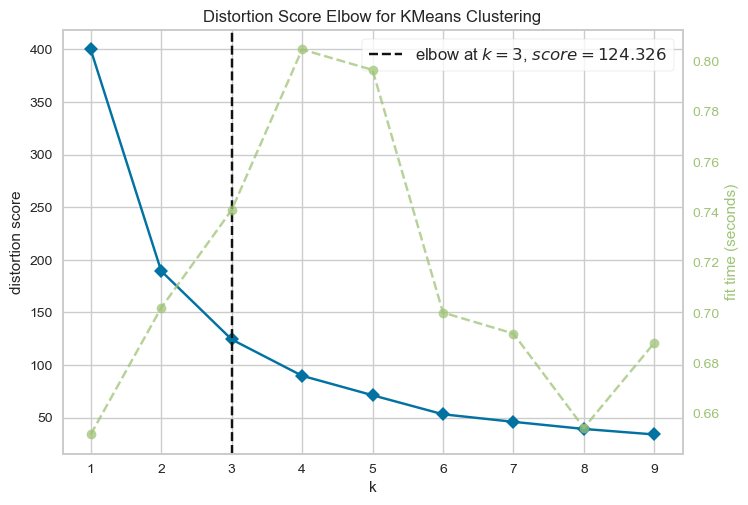

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# K-Means Clustering :
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# looking for right parameter k :
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10)).fit(data_2col)
visualizer.show()

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

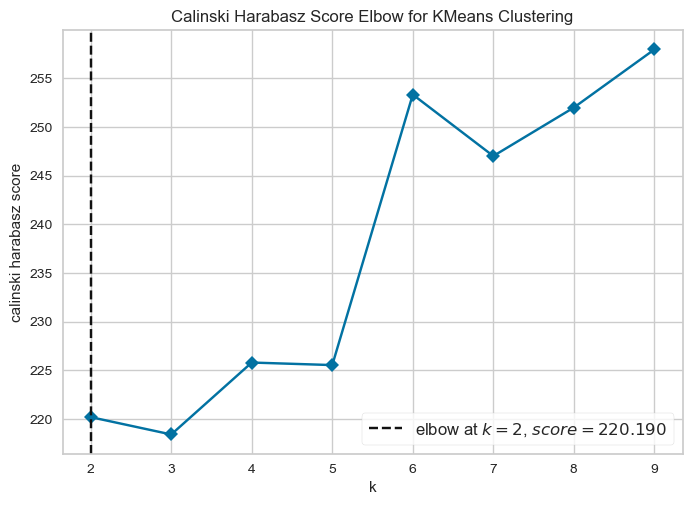

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [59]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(data_2col)
visualizer.poof()

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

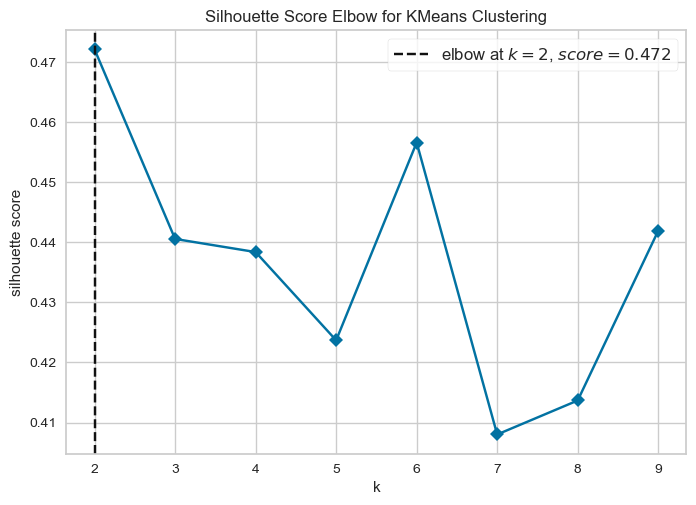

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(data_2col)
visualizer.poof()

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


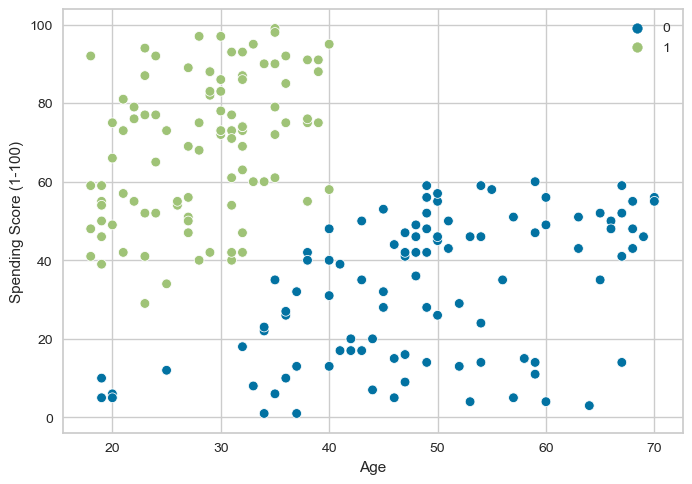

In [64]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data_2col)

sns.scatterplot(data=data, x="Age", y="Spending Score (1-100)", hue=kmeans.labels_)

plt.show()

C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Klaudia\anaconda3\envs\datascience2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


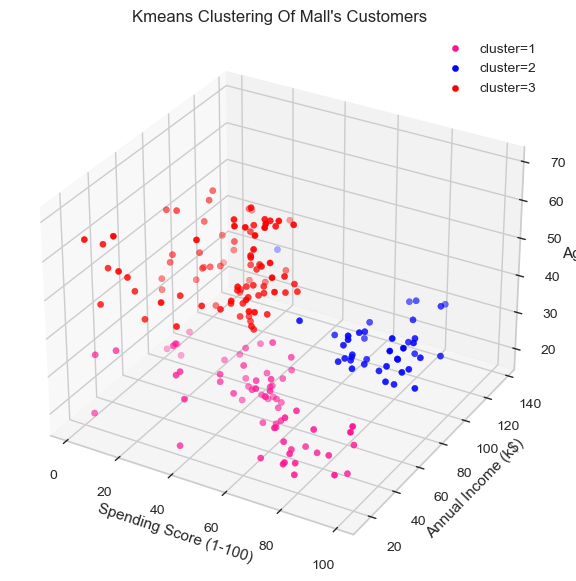

In [71]:
# 3 dimensional clustering :
data3d = data.drop(columns=['CustomerID', 'Gender'])
kmeans3d = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = kmeans3d.fit_predict(scaled_data)
data3d['cluster'] = y

color_list = ['deeppink', 'blue', 'red', 'orange', 'darkviolet', 'brown']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Data for 3-dimensional scattered points :
for i in range(data3d.cluster.nunique()):
    label = "cluster=" + str(i+1)
    ax.scatter3D(data3d[data3d.cluster==i]['Spending Score (1-100)'], data3d[data3d.cluster==i]['Annual Income (k$)'], data3d[data3d.cluster==i]['Age'], c=color_list[i], label=label)

ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Age')
plt.legend()
plt.title("Kmeans Clustering Of Mall's Customers")
plt.show()